# Matplotlib: Scatter Plots

In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Scatter Plot Basics 
* Matplotlib Scatter Plot
    * [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
* Pandas Scatter Plot
    * [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
* Pandas Plot
    * [pandas.DataFrame.plot(kind='scatter')](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot)

### Use Cases
* Show coorelation between multiple variables
    * Example
        * Show how median salary and the demand(count) of a skill correlate to each other

### Example 1: Simple Example with Fake Data

<Axes: xlabel='skill_count', ylabel='skill_pay'>

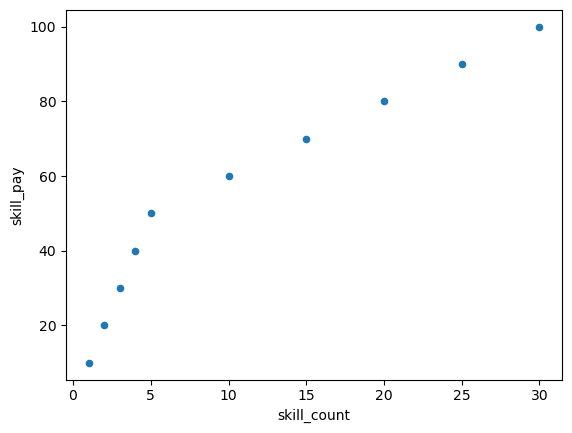

In [5]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_fake = pd.DataFrame(data)

df_fake.plot(kind='scatter', x='skill_count', y='skill_pay')

### Example 3: Salary vs. Count of Data Analyst Job Postings for Top 10 Skills

In [8]:
# Filter down to Data Analyst Job Postings
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [9]:
# expand the job skills column to 1 row per skill for each job posting
df_exploded = df_DA.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [16]:
# Group the job skills to get job counts and median salary per skill
df_skill_stats = df_exploded.groupby('job_skills').agg(
    # Syntax for each aggregation: 
    # column name=Tuple(source column name, aggregrate function)
    skill_count=('job_skills', 'count'), 
    median_salary=('salary_year_avg', 'median')
)

# Sort by skill count descending and take top 10
df_skill_stats_sorted = df_skill_stats.sort_values(by='skill_count', ascending=False).head(10)
df_skill_stats_sorted

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


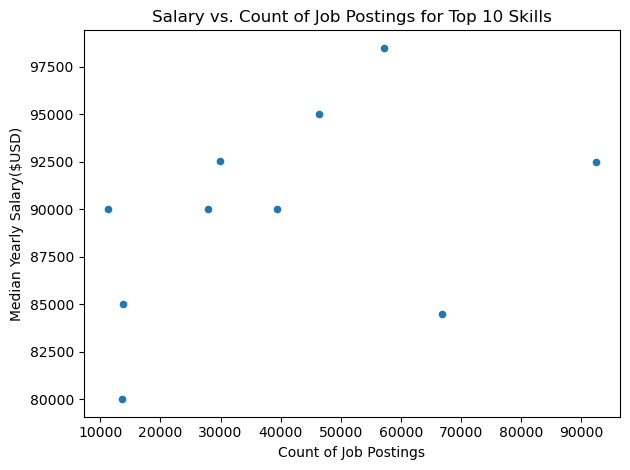

In [20]:
# Plot the data
df_skill_stats_sorted.plot(kind='scatter', x='skill_count', y='median_salary')

# Format Scatter Plot
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

#### Adding labels to data points
* ['matplotlib.pyplot.text'](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

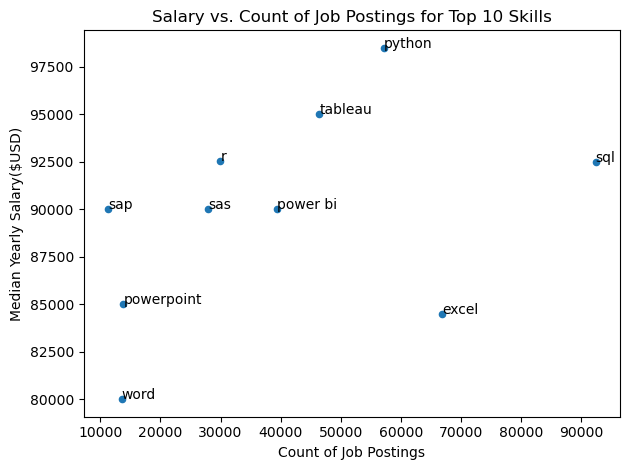

In [39]:
# # Plot the data
df_skill_stats_sorted.plot(kind='scatter', x='skill_count', y='median_salary')

# Format Scatter Plot
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')


# Point Labels
# i = index id
# column_name = index value(skill name)
for i, column_name in enumerate(df_skill_stats_sorted.index):
    
    # x coordinate = count of job postings
    # y coordinate = median salary
    # s (Text Label) = skill    
    plt.text(        
        x=df_skill_stats_sorted['skill_count'].iloc[i], 
        y=df_skill_stats_sorted['median_salary'].iloc[i],
        s=column_name
    )
    
plt.tight_layout()
plt.show()

# Problems

In [20]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Median Yearly Salary vs. Job Count (2.15.1) - Problem

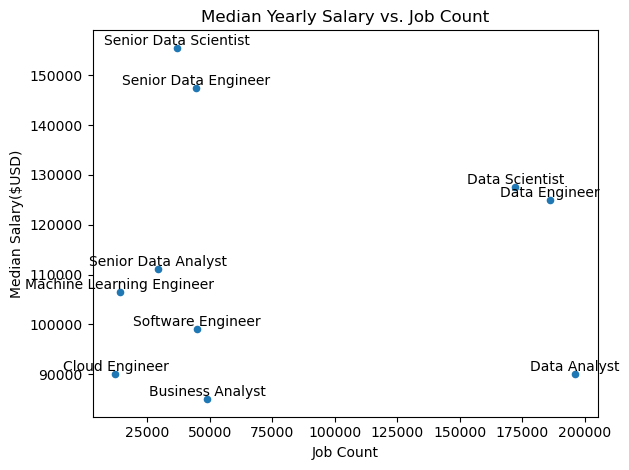

In [2]:
df_job_title_stats = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')
).dropna()

df_job_title_stats_sorted = df_job_title_stats.sort_values(by='median_salary', ascending=False)
df_job_title_stats_sorted.plot(kind='scatter', x='job_count', y='median_salary')

# Format Chart
plt.xlabel('Job Count')
plt.ylabel('Median Salary($USD)')
plt.title('Median Yearly Salary vs. Job Count')

for i, point_label in enumerate(df_job_title_stats_sorted.index):
    
    # x coordinate = job count
    # y cordinate = median salary
    # s (point label) = job title short
    plt.text(
        x=df_job_title_stats_sorted['job_count'].iloc[i],
        y=df_job_title_stats_sorted['median_salary'].iloc[i],
        s=point_label,
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem

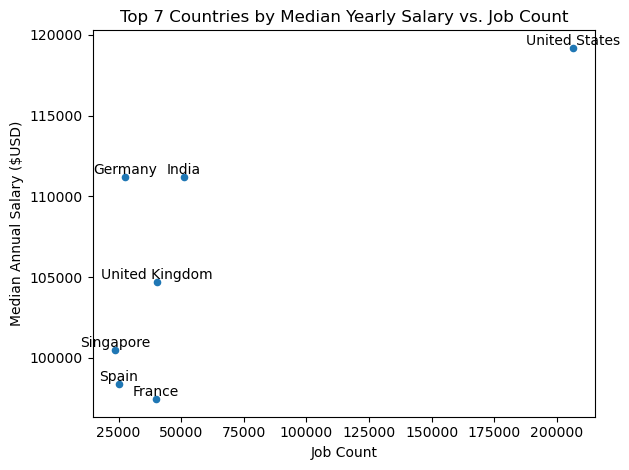

In [5]:
df_top_countries = df.groupby('job_country').agg(
    job_count=('job_country','count'),
    median_yearly_salary=('salary_year_avg', 'median')
).dropna()

df_top_countries_sorted = df_top_countries.sort_values(by='job_count', ascending=False).head(7)

df_top_countries_sorted.plot(kind='scatter', x='job_count', y='median_yearly_salary')

plt.xlabel('Job Count')
plt.ylabel('Median Annual Salary ($USD)')
plt.title('Top 7 Countries by Median Yearly Salary vs. Job Count')

for i, country_label in enumerate(df_top_countries_sorted.index):
    plt.text(
        x=df_top_countries_sorted['job_count'].iloc[i],
        y=df_top_countries_sorted['median_yearly_salary'].iloc[i],
        s=country_label,
        ha='center',
        va='bottom'  
    )

plt.tight_layout()
plt.show()

## Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem

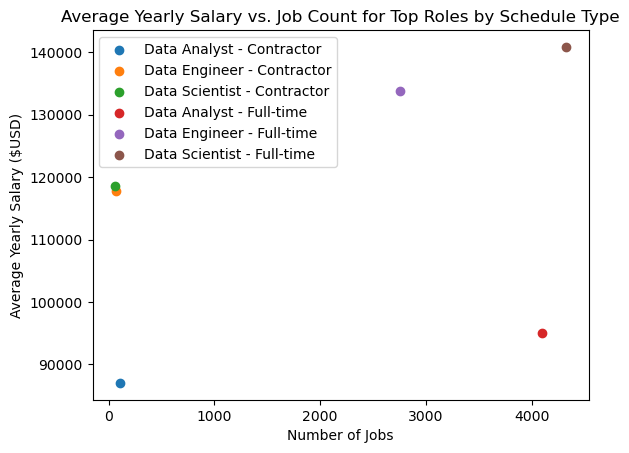

In [63]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
target_job_schedule_type = ['Full-time', 'Contractor']

df_top_role_stats = df[(df['job_title_short'].isin(target_job_titles)) &
                       (df['job_country'] == 'United States') &
                       (df['job_schedule_type'].isin(target_job_schedule_type))].copy()


df_top_role_stats['job_title_type'] = df_top_role_stats['job_title_short'] + ' - ' + df_top_role_stats['job_schedule_type']



df_top_role_stats.dropna(subset='salary_year_avg', inplace=True)



df_top_role_stats = df_top_role_stats.sort_values(by=['job_schedule_type', 'job_title_short'])

df_top_role_stats = df_top_role_stats.groupby(['job_title_type', 'job_schedule_type', 'job_title_short']).agg(
    job_count=('job_title_type', 'count'),
    average_yearly_salary=('salary_year_avg', 'mean')
).reset_index()


df_top_role_stats = df_top_role_stats.sort_values(by=['job_schedule_type', 'job_title_short'])

for role in df_top_role_stats['job_title_type']:
    df_current_role = df_top_role_stats[df_top_role_stats['job_title_type'] == role]
    plt.scatter(
        x=df_current_role['job_count'],
        y=df_current_role['average_yearly_salary'],
        label=role 
    )


plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary ($USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()